# Start Python and Check Versions

In [2]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy 
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
scipy: 1.3.1
numpy: 1.16.5
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.21.3


# Load The Data

## Import libraries

In [3]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import os

##  Load RAW Dataset

In [48]:
# Load dataset   
file = os.path.join('Resources','Crimes_2001_to_present.csv')
names = ['Date', 'Primary Type', 'Latitude', 'Longitude']
dataset = pd.read_csv(file)    
dataset = dataset.loc[:, names]
dataset = dataset[dataset['Primary Type'] != 'NON - CRIMINAL' ]
dataset = dataset[dataset['Primary Type'] != 'NON-CRIMINAL' ] 
dataset = dataset[dataset['Primary Type'] != 'NON-CRIMINAL (SUBJECT SPECIFIED)' ]
dataset = dataset.dropna(axis=0, how='any')
dataset['Date'] = pd.to_datetime(dataset['Date']).dt.date
dataset['Date'] = pd.to_datetime(dataset.Date,format='%Y-%m-%d %H:%M')

In [49]:
dataset = dataset.dropna(how='any')
print(dataset.shape)
dataset.head()

(6811610, 4)


Date Primary Type   Latitude  Longitude
71   2019-06-19     HOMICIDE  41.763714 -87.691782
349  2019-06-19     HOMICIDE  41.711437 -87.639309
1348 2019-06-18     HOMICIDE  41.776019 -87.615520
2064 2019-06-17     HOMICIDE  41.935855 -87.644258
2138 2019-06-16     HOMICIDE  41.752480 -87.569903

## Save dataframe to file

In [50]:
file = os.path.join('Resources', 'Crimes_2001_2019.csv')
dataset.to_csv(file, encoding='utf-8', index=False)

 # Load Down Sized Dataset

In [51]:
file = os.path.join('Resources','Crimes_2001_2019.csv')
dataset = pd.read_csv(file)

## Peek at the Data

In [52]:
# head
dataset.head(5)

Date Primary Type   Latitude  Longitude
0  2019-06-19     HOMICIDE  41.763714 -87.691782
1  2019-06-19     HOMICIDE  41.711437 -87.639309
2  2019-06-18     HOMICIDE  41.776019 -87.615520
3  2019-06-17     HOMICIDE  41.935855 -87.644258
4  2019-06-16     HOMICIDE  41.752480 -87.569903

In [53]:
# shape and describe
print(dataset.shape)

(6811610, 4)


## Statistical Summary

In [54]:
# descriptions
print(dataset.describe())

           Latitude     Longitude
count  6.811610e+06  6.811610e+06
mean   4.184203e+01 -8.767178e+01
std    8.994493e-02  6.208642e-02
min    3.661945e+01 -9.168657e+01
25%    4.176891e+01 -8.771385e+01
50%    4.185551e+01 -8.766615e+01
75%    4.190682e+01 -8.762835e+01
max    4.202291e+01 -8.752453e+01


## Distribution

In [55]:
# distribution
print(dataset.groupby('Primary Type').size())

Primary Type
ARSON                                  11258
ASSAULT                               426624
BATTERY                              1250565
BURGLARY                              391369
CONCEALED CARRY LICENSE VIOLATION        372
CRIM SEXUAL ASSAULT                    26526
CRIMINAL DAMAGE                       780562
CRIMINAL TRESPASS                     195821
DECEPTIVE PRACTICE                    262080
DOMESTIC VIOLENCE                          1
GAMBLING                               14352
HOMICIDE                                9740
HUMAN TRAFFICKING                         52
INTERFERENCE WITH PUBLIC OFFICER       15745
INTIMIDATION                            3995
KIDNAPPING                              6706
LIQUOR LAW VIOLATION                   14013
MOTOR VEHICLE THEFT                   315862
NARCOTICS                             708649
OBSCENITY                                585
OFFENSE INVOLVING CHILDREN             44259
OTHER NARCOTIC VIOLATION                 1

# DATA EXTRACTION

In [56]:
options = ['BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'THEFT', 'OTHER OFFENSE', 'BURGLARY']   
# selecting rows based on condition 
df = dataset[dataset['Primary Type'].isin(options)] 

for c in options:
    df.insert(2 + options.index(c), c, 0.0)
    
i = 0  
for c in df['Primary Type']:
    df.iat[i, df.columns.get_loc(c)] = 1.0
    i += 1

df.head()    

Date     Primary Type  BATTERY  CRIMINAL DAMAGE  NARCOTICS  THEFT  \
56  2019-05-21    OTHER OFFENSE      0.0              0.0        0.0    0.0   
58  2019-05-21            THEFT      0.0              0.0        0.0    1.0   
59  2019-05-21        NARCOTICS      0.0              0.0        1.0    0.0   
60  2019-05-21          BATTERY      1.0              0.0        0.0    0.0   
62  2019-05-21  CRIMINAL DAMAGE      0.0              1.0        0.0    0.0   

    OTHER OFFENSE  BURGLARY   Latitude  Longitude  
56            1.0       0.0  41.695110 -87.671597  
58            0.0       0.0  41.889730 -87.734260  
59            0.0       0.0  41.750941 -87.625185  
60            0.0       0.0  41.668009 -87.625926  
62            0.0       0.0  41.750466 -87.622981

In [57]:
if 'Primary Type' in df:
    del df['Primary Type']
df.columns = [ 'Date', 'battery', 'damage', 'narcotics', 'theft', 'other', 'burglary', 'Latitude', 'Longitude']
df.head() 

Date  battery  damage  narcotics  theft  other  burglary   Latitude  \
56  2019-05-21      0.0     0.0        0.0    0.0    1.0       0.0  41.695110   
58  2019-05-21      0.0     0.0        0.0    1.0    0.0       0.0  41.889730   
59  2019-05-21      0.0     0.0        1.0    0.0    0.0       0.0  41.750941   
60  2019-05-21      1.0     0.0        0.0    0.0    0.0       0.0  41.668009   
62  2019-05-21      0.0     1.0        0.0    0.0    0.0       0.0  41.750466   

    Longitude  
56 -87.671597  
58 -87.734260  
59 -87.625185  
60 -87.625926  
62 -87.622981

In [58]:
df.battery = df['battery'].astype(numpy.int64)
df.damage = df['damage'].astype(numpy.int64)
df.narcotics = df['narcotics'].astype(numpy.int64)
df.theft = df['theft'].astype(numpy.int64)
df.other = df['other'].astype(numpy.int64)
print(df.dtypes)

C:\Users\skao2\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Date          object
battery        int64
damage         int64
narcotics      int64
theft          int64
other          int64
burglary     float64
Latitude     float64
Longitude    float64
dtype: object


In [59]:
# DATE TIME STAMP FUNCTION
column_1 = pd.to_datetime(pd.Series(df.iloc[:,0]))
#print(type(column_1))
db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

In [60]:
if 'Date' in df:
    del df['Date']
df=pd.concat([db,df],axis=1)
df = df.loc[:,~df.columns.duplicated()] 
df = df.loc[df['year']==2018, :]
df.head(10000)

year  month  day  hour  dayofyear  week  weekofyear  dayofweek  \
90647   2018     12   31     0        365     1           1          0   
90649   2018     12   31     0        365     1           1          0   
90650   2018     12   31     0        365     1           1          0   
90651   2018     12   31     0        365     1           1          0   
90652   2018     12   31     0        365     1           1          0   
...      ...    ...  ...   ...        ...   ...         ...        ...   
104989  2018     12   10     0        344    50          50          0   
104990  2018     12   10     0        344    50          50          0   
104992  2018     12   10     0        344    50          50          0   
104993  2018     12   10     0        344    50          50          0   
104994  2018     12   10     0        344    50          50          0   

        weekday  quarter  battery  damage  narcotics  theft  other  burglary  \
90647         0        4        0       1          0      0      0       0.0   
90649         0        4        0       1          0      0      0       0.0   
90650         0        4        1       0          0      0      0       0.0   
90651         0        4        1       0          0      0      0       0.0   
90652         0        4        1       0          0      0      0       0.0   
...         ...      ...      ...     ...        ...    ...    ...       ...   
104989        0        4        0       0          0      0      0       1.0   
104990        0        4        0       0          0      1      0       0.0   
104992        0        4        0       0          0      1      0       0.0   
104993        0        4        0       0          0      1      0       0.0   
104994        0        4        0       0          0      1      0       0.0   

         Latitude  Longitude  
90647   41.689079 -87.696064  
90649   41.740521 -87.647391  
90650   41.857068 -87.657625  
90651   41.751914 -87.647717  
90652   41.875684 -87.760479  
...           ...        ...  
104989  41.883334 -87.760227  
104990  41.939651 -87.644386  
104992  41.899410 -87.624131  
104993  41.945234 -87.664488  
104994  41.779182 -87.688966  

[10000 rows x 18 columns]

In [61]:
from random import sample
rindex =  numpy.array(sample(range(len(df)), 2500))
df = df.iloc[rindex, :]
df.head()

year  month  day  hour  dayofyear  week  weekofyear  dayofweek  \
223074  2018      7    4     0        185    27          27          2   
198750  2018      8    4     0        216    31          31          5   
333012  2018      2    2     0         33     5           5          4   
331997  2018      2    3     0         34     5           5          5   
327892  2018      2   11     0         42     6           6          6   

        weekday  quarter  battery  damage  narcotics  theft  other  burglary  \
223074        2        3        1       0          0      0      0       0.0   
198750        5        3        1       0          0      0      0       0.0   
333012        4        1        0       0          0      0      1       0.0   
331997        5        1        0       0          0      1      0       0.0   
327892        6        1        0       0          0      1      0       0.0   

         Latitude  Longitude  
223074  41.759260 -87.632069  
198750  41.748508 -87.633032  
333012  41.693222 -87.611887  
331997  41.952229 -87.767581  
327892  41.844537 -87.703328

In [62]:
columnsTitles=["day","dayofweek",'dayofyear', 'hour', 'month', 'quarter', 'week', 'weekday', 'weekofyear', \
               'year', 'battery', 'damage', 'narcotics', 'theft', 'other', 'burglary', 'Latitude', 'Longitude']
df=df.reindex(columns=columnsTitles)
df.head()

day  dayofweek  dayofyear  hour  month  quarter  week  weekday  \
223074    4          2        185     0      7        3    27        2   
198750    4          5        216     0      8        3    31        5   
333012    2          4         33     0      2        1     5        4   
331997    3          5         34     0      2        1     5        5   
327892   11          6         42     0      2        1     6        6   

        weekofyear  year  battery  damage  narcotics  theft  other  burglary  \
223074          27  2018        1       0          0      0      0       0.0   
198750          31  2018        1       0          0      0      0       0.0   
333012           5  2018        0       0          0      0      1       0.0   
331997           5  2018        0       0          0      1      0       0.0   
327892           6  2018        0       0          0      1      0       0.0   

         Latitude  Longitude  
223074  41.759260 -87.632069  
198750  41.748508 -87.633032  
333012  41.693222 -87.611887  
331997  41.952229 -87.767581  
327892  41.844537 -87.703328

In [63]:
print(df.dtypes)
df.year = df['year'].astype(float)
df.month = df['month'].astype(float)
df.day = df['day'].astype(float)
df.day = df['hour'].astype(float)
df.dayofyear = df['dayofyear'].astype(float)
df.dayofyear = df['week'].astype(float)
df.weekofyear = df['weekofyear'].astype(float)
df.dayofweek = df['dayofweek'].astype(float)
df.dayofweek = df['weekday'].astype(float)
df.quarter = df['quarter'].astype(float)
print(df.dtypes)

day             int64
dayofweek       int64
dayofyear       int64
hour            int64
month           int64
quarter         int64
week            int64
weekday         int64
weekofyear      int64
year            int64
battery         int64
damage          int64
narcotics       int64
theft           int64
other           int64
burglary      float64
Latitude      float64
Longitude     float64
dtype: object
day           float64
dayofweek     float64
dayofyear     float64
hour            int64
month         float64
quarter       float64
week            int64
weekday         int64
weekofyear    float64
year          float64
battery         int64
damage          int64
narcotics       int64
theft           int64
other           int64
burglary      float64
Latitude      float64
Longitude     float64
dtype: object


In [64]:
df.head()

day  dayofweek  dayofyear  hour  month  quarter  week  weekday  \
223074  0.0        2.0       27.0     0    7.0      3.0    27        2   
198750  0.0        5.0       31.0     0    8.0      3.0    31        5   
333012  0.0        4.0        5.0     0    2.0      1.0     5        4   
331997  0.0        5.0        5.0     0    2.0      1.0     5        5   
327892  0.0        6.0        6.0     0    2.0      1.0     6        6   

        weekofyear    year  battery  damage  narcotics  theft  other  \
223074        27.0  2018.0        1       0          0      0      0   
198750        31.0  2018.0        1       0          0      0      0   
333012         5.0  2018.0        0       0          0      0      1   
331997         5.0  2018.0        0       0          0      1      0   
327892         6.0  2018.0        0       0          0      1      0   

        burglary   Latitude  Longitude  
223074       0.0  41.759260 -87.632069  
198750       0.0  41.748508 -87.633032  
333012       0.0  41.693222 -87.611887  
331997       0.0  41.952229 -87.767581  
327892       0.0  41.844537 -87.703328

## Save selected dataframe to file

In [65]:
file = os.path.join('Resources','Crimes_selected.csv')
df.to_csv(file, encoding='utf-8', index=False)

# Load selected data file ( Start from here to save time for running )

In [4]:
file = os.path.join('Resources','Crimes_selected.csv')
df = pd.read_csv(file)
df.head()

year  month   day  hour  dayofyear  week  weekofyear  dayofweek  weekday  \
0  2018.0    2.0  28.0  21.0       59.0   9.0         9.0        2.0      2.0   
1  2018.0    2.0  28.0  21.0       59.0   9.0         9.0        2.0      2.0   
2  2018.0    2.0  28.0  10.0       59.0   9.0         9.0        2.0      2.0   
3  2018.0    2.0  28.0  10.0       59.0   9.0         9.0        2.0      2.0   
4  2018.0    2.0  28.0  10.0       59.0   9.0         9.0        2.0      2.0   

   quarter  battery  damage  narcotics  theft  other  burglary   latitude  \
0      1.0        1       0          0      0      0         0  22.737260   
1      1.0        1       0          0      0      0         0  22.720992   
2      1.0        0       0          1      0      0         0  22.736676   
3      1.0        0       0          1      0      0         0  22.746527   
4      1.0        0       0          1      0      0         0  22.769531   

   longitude  
0  75.875987  
1  75.876083  
2  75.883168  
3  75.887139  
4  75.888772

# Data Visualization

## Univariate Plots

C:\Users\skao2\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\skao2\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


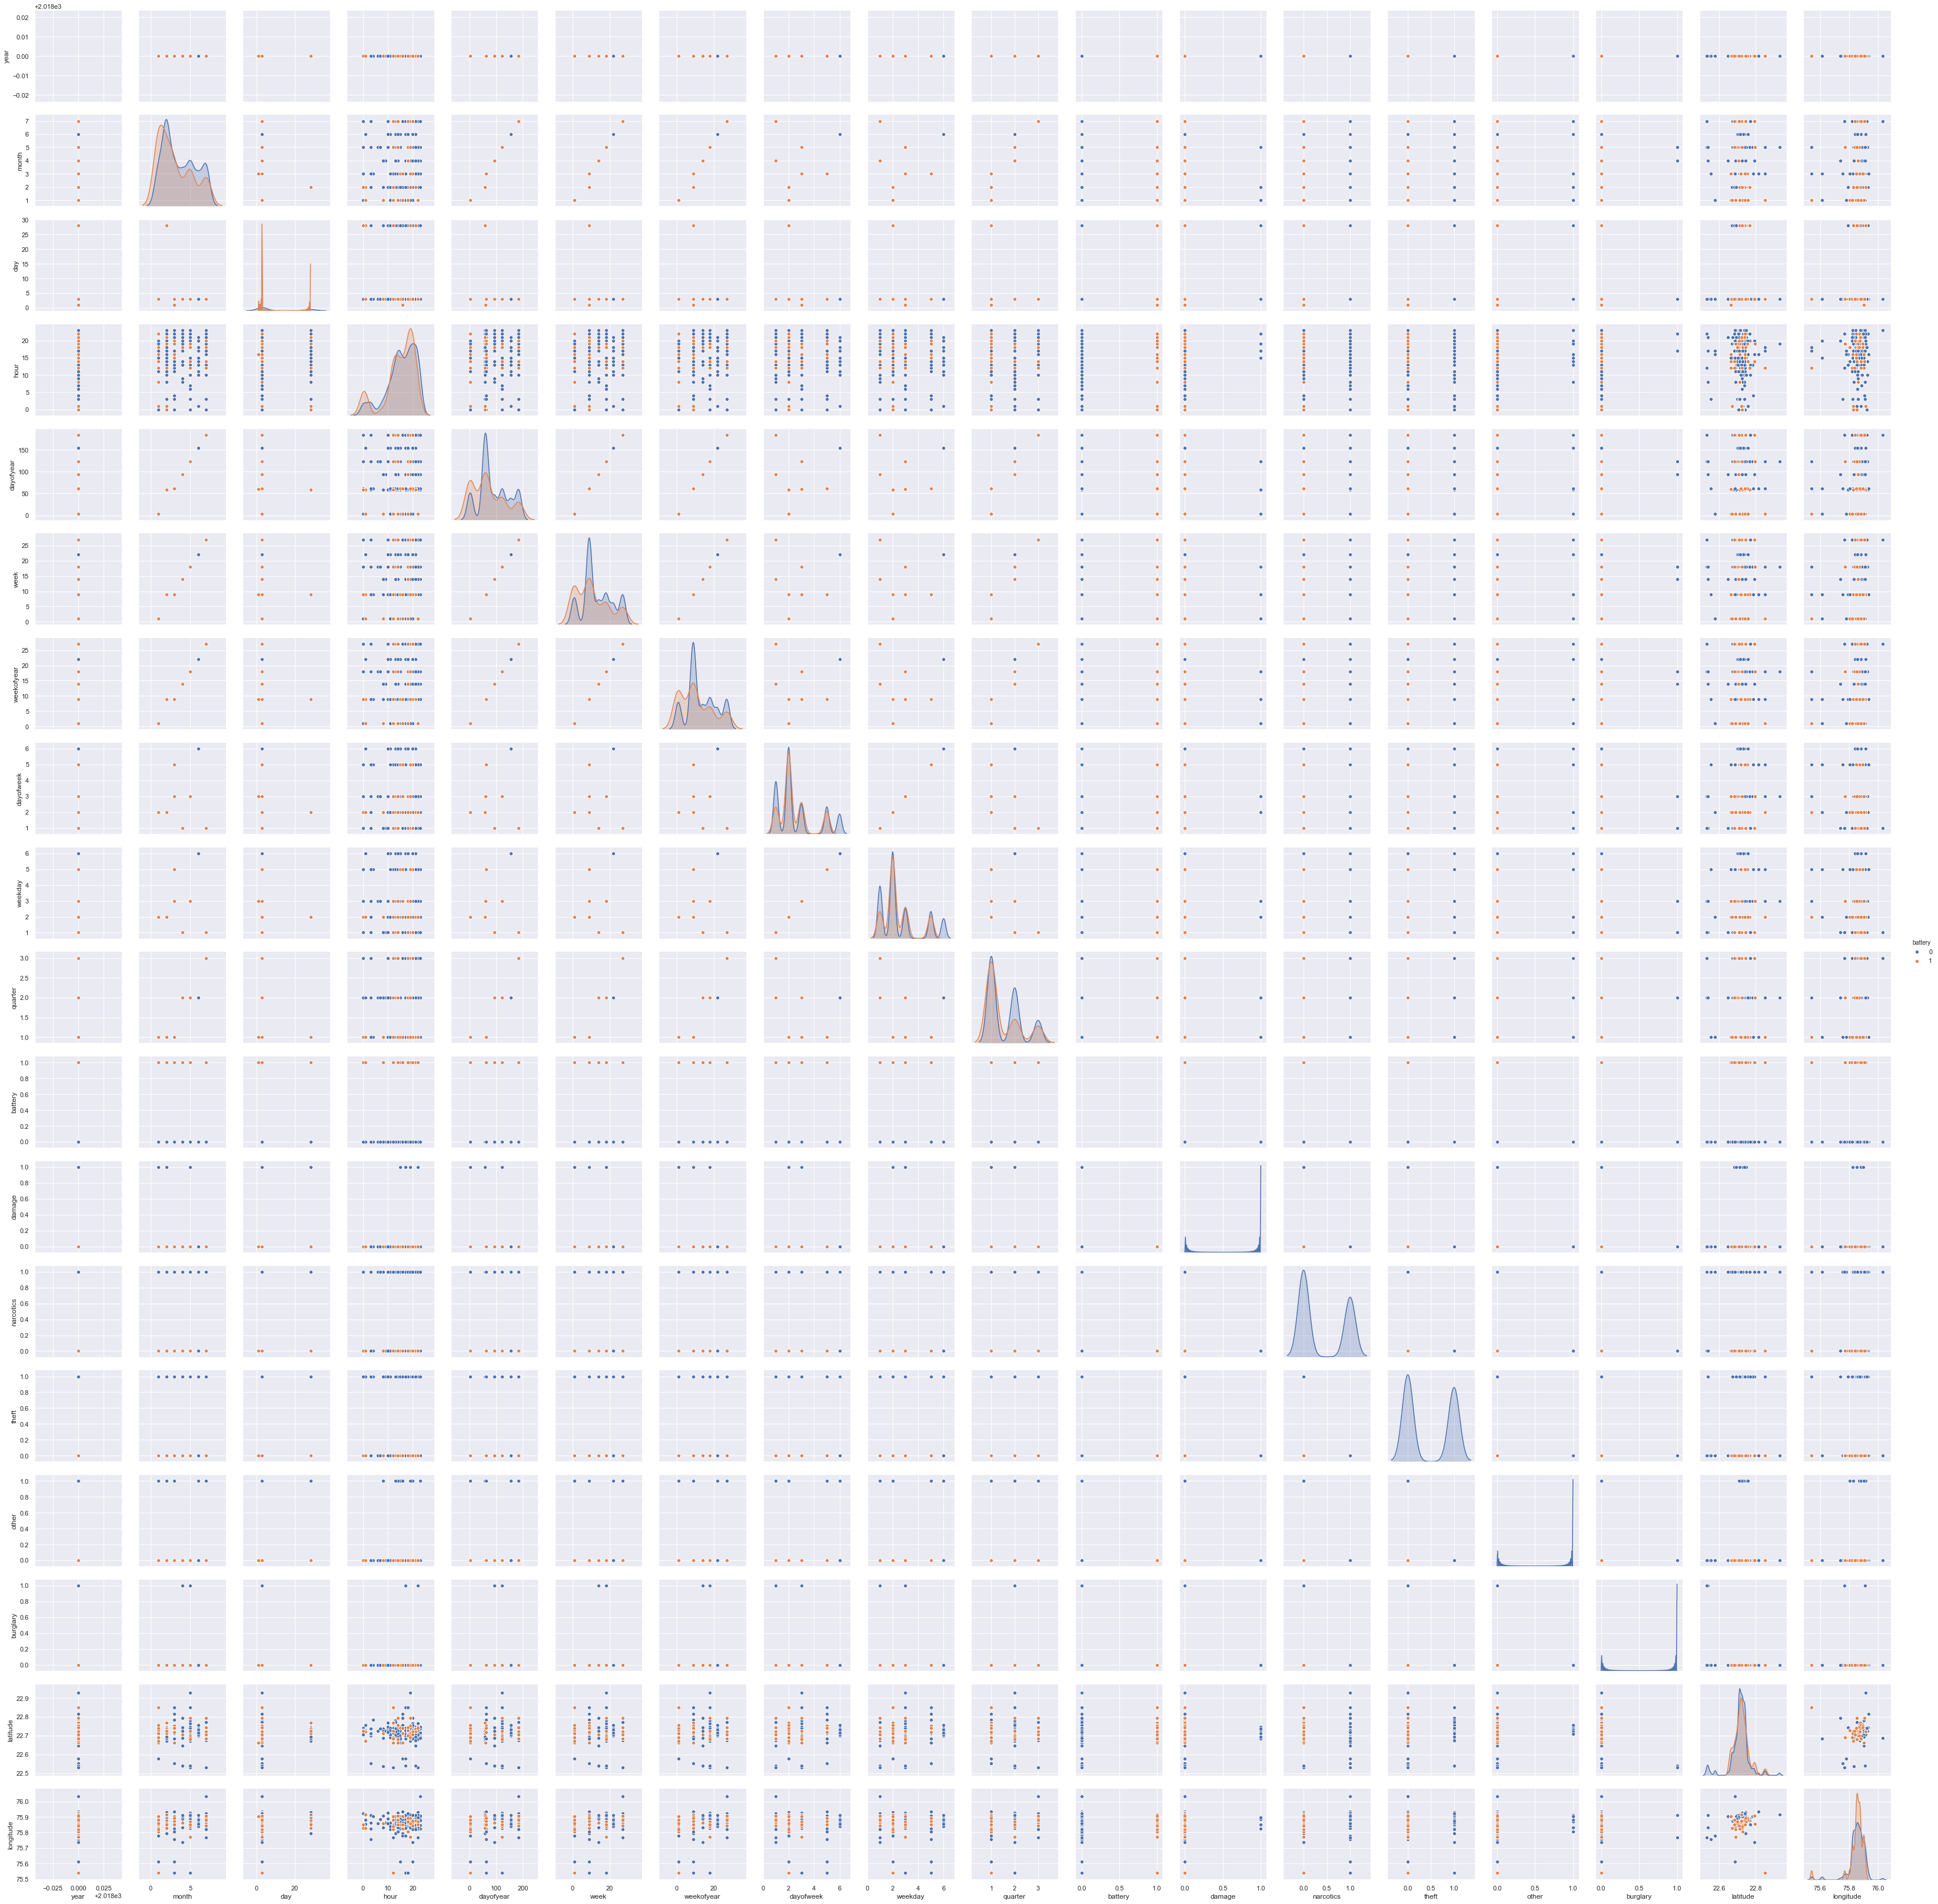

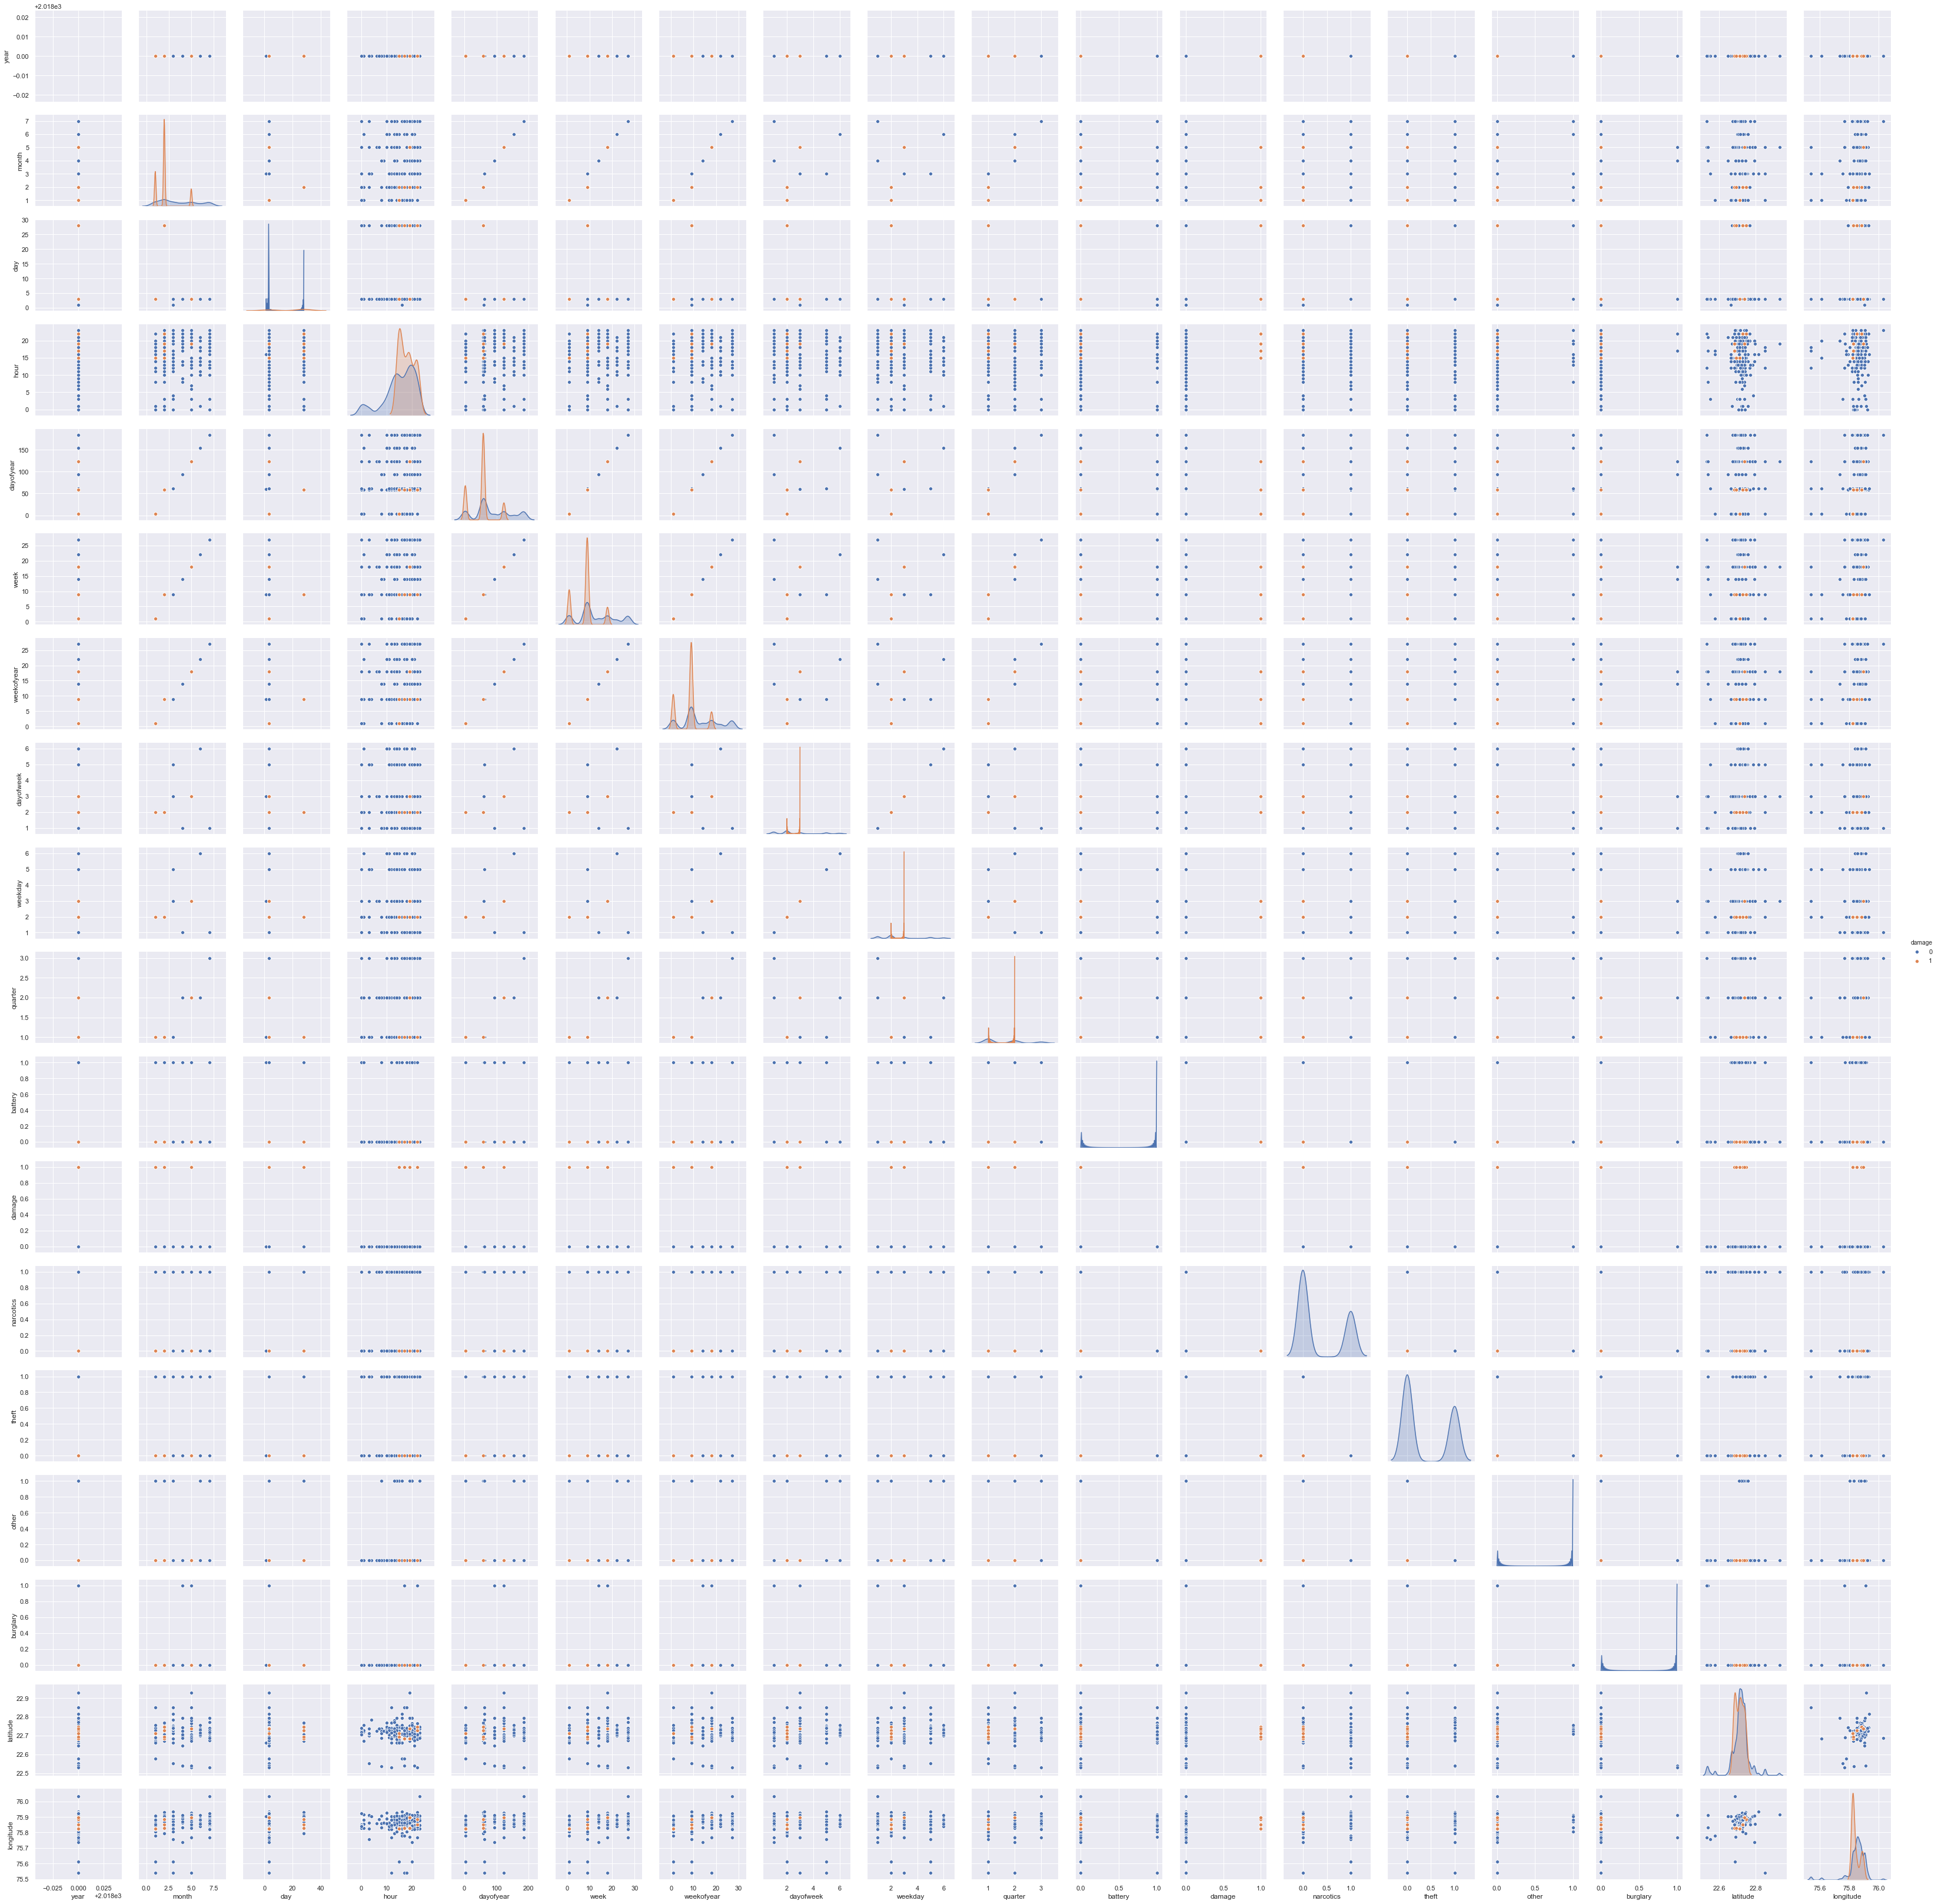

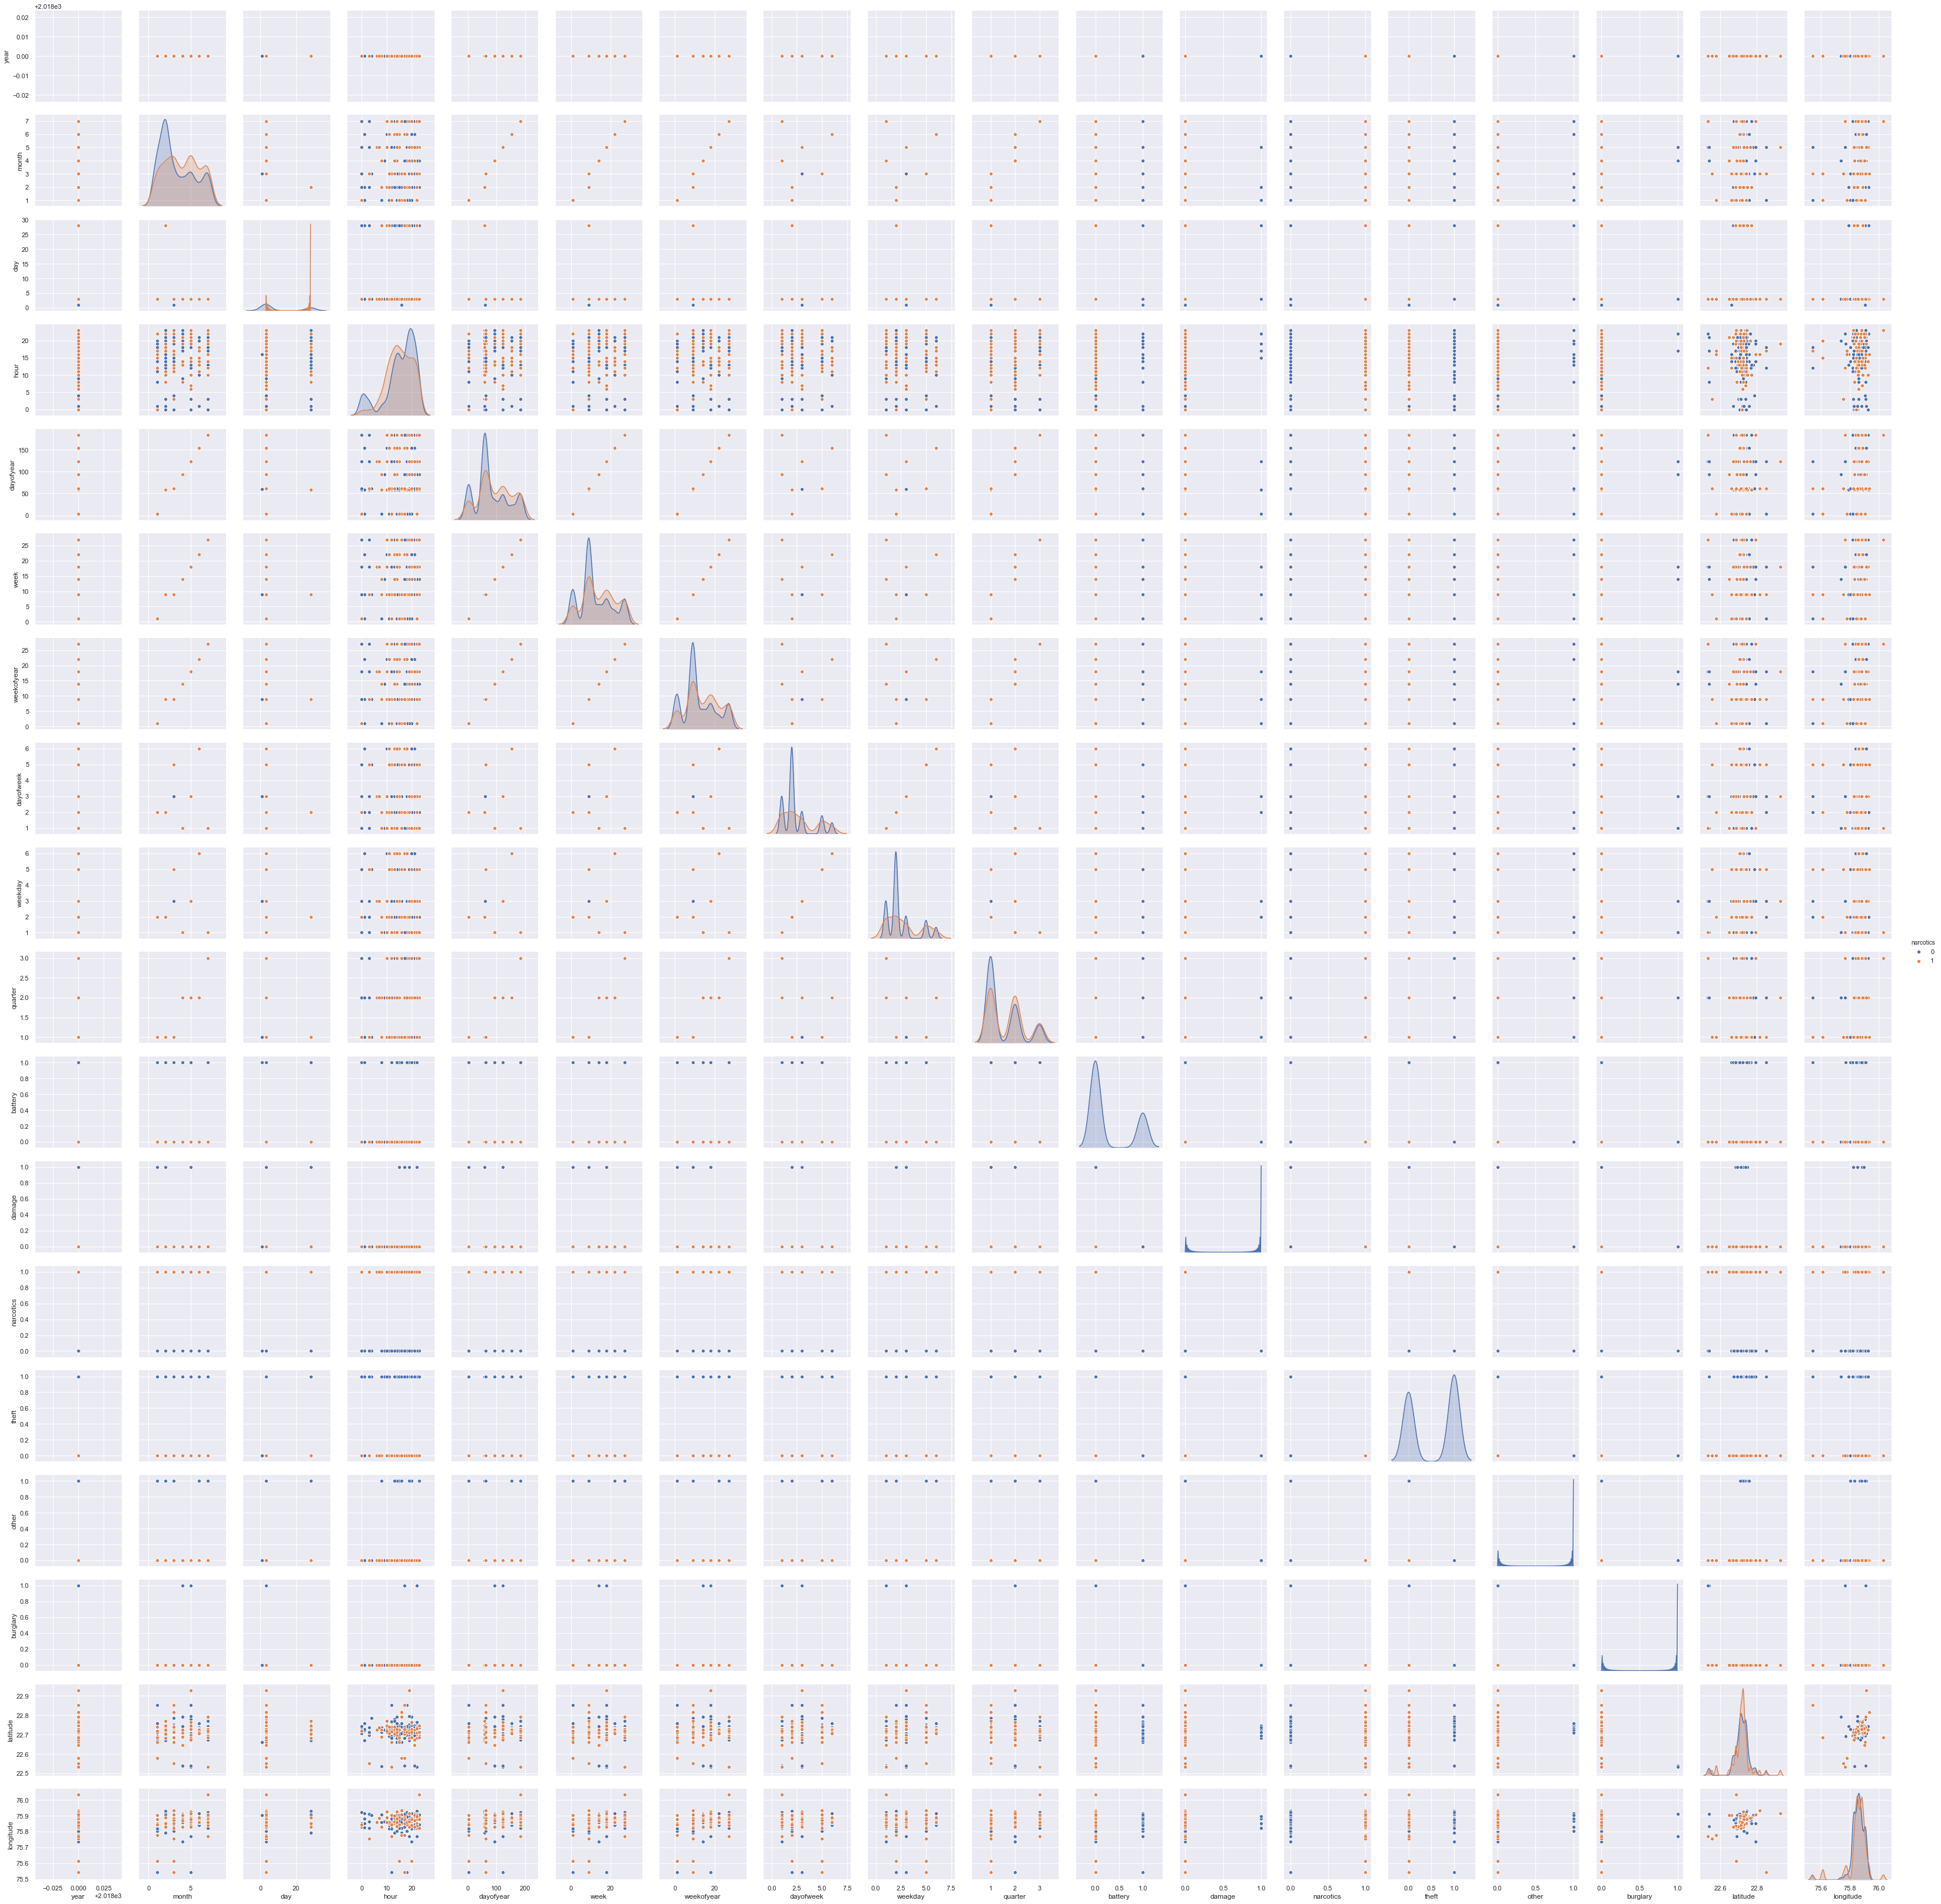

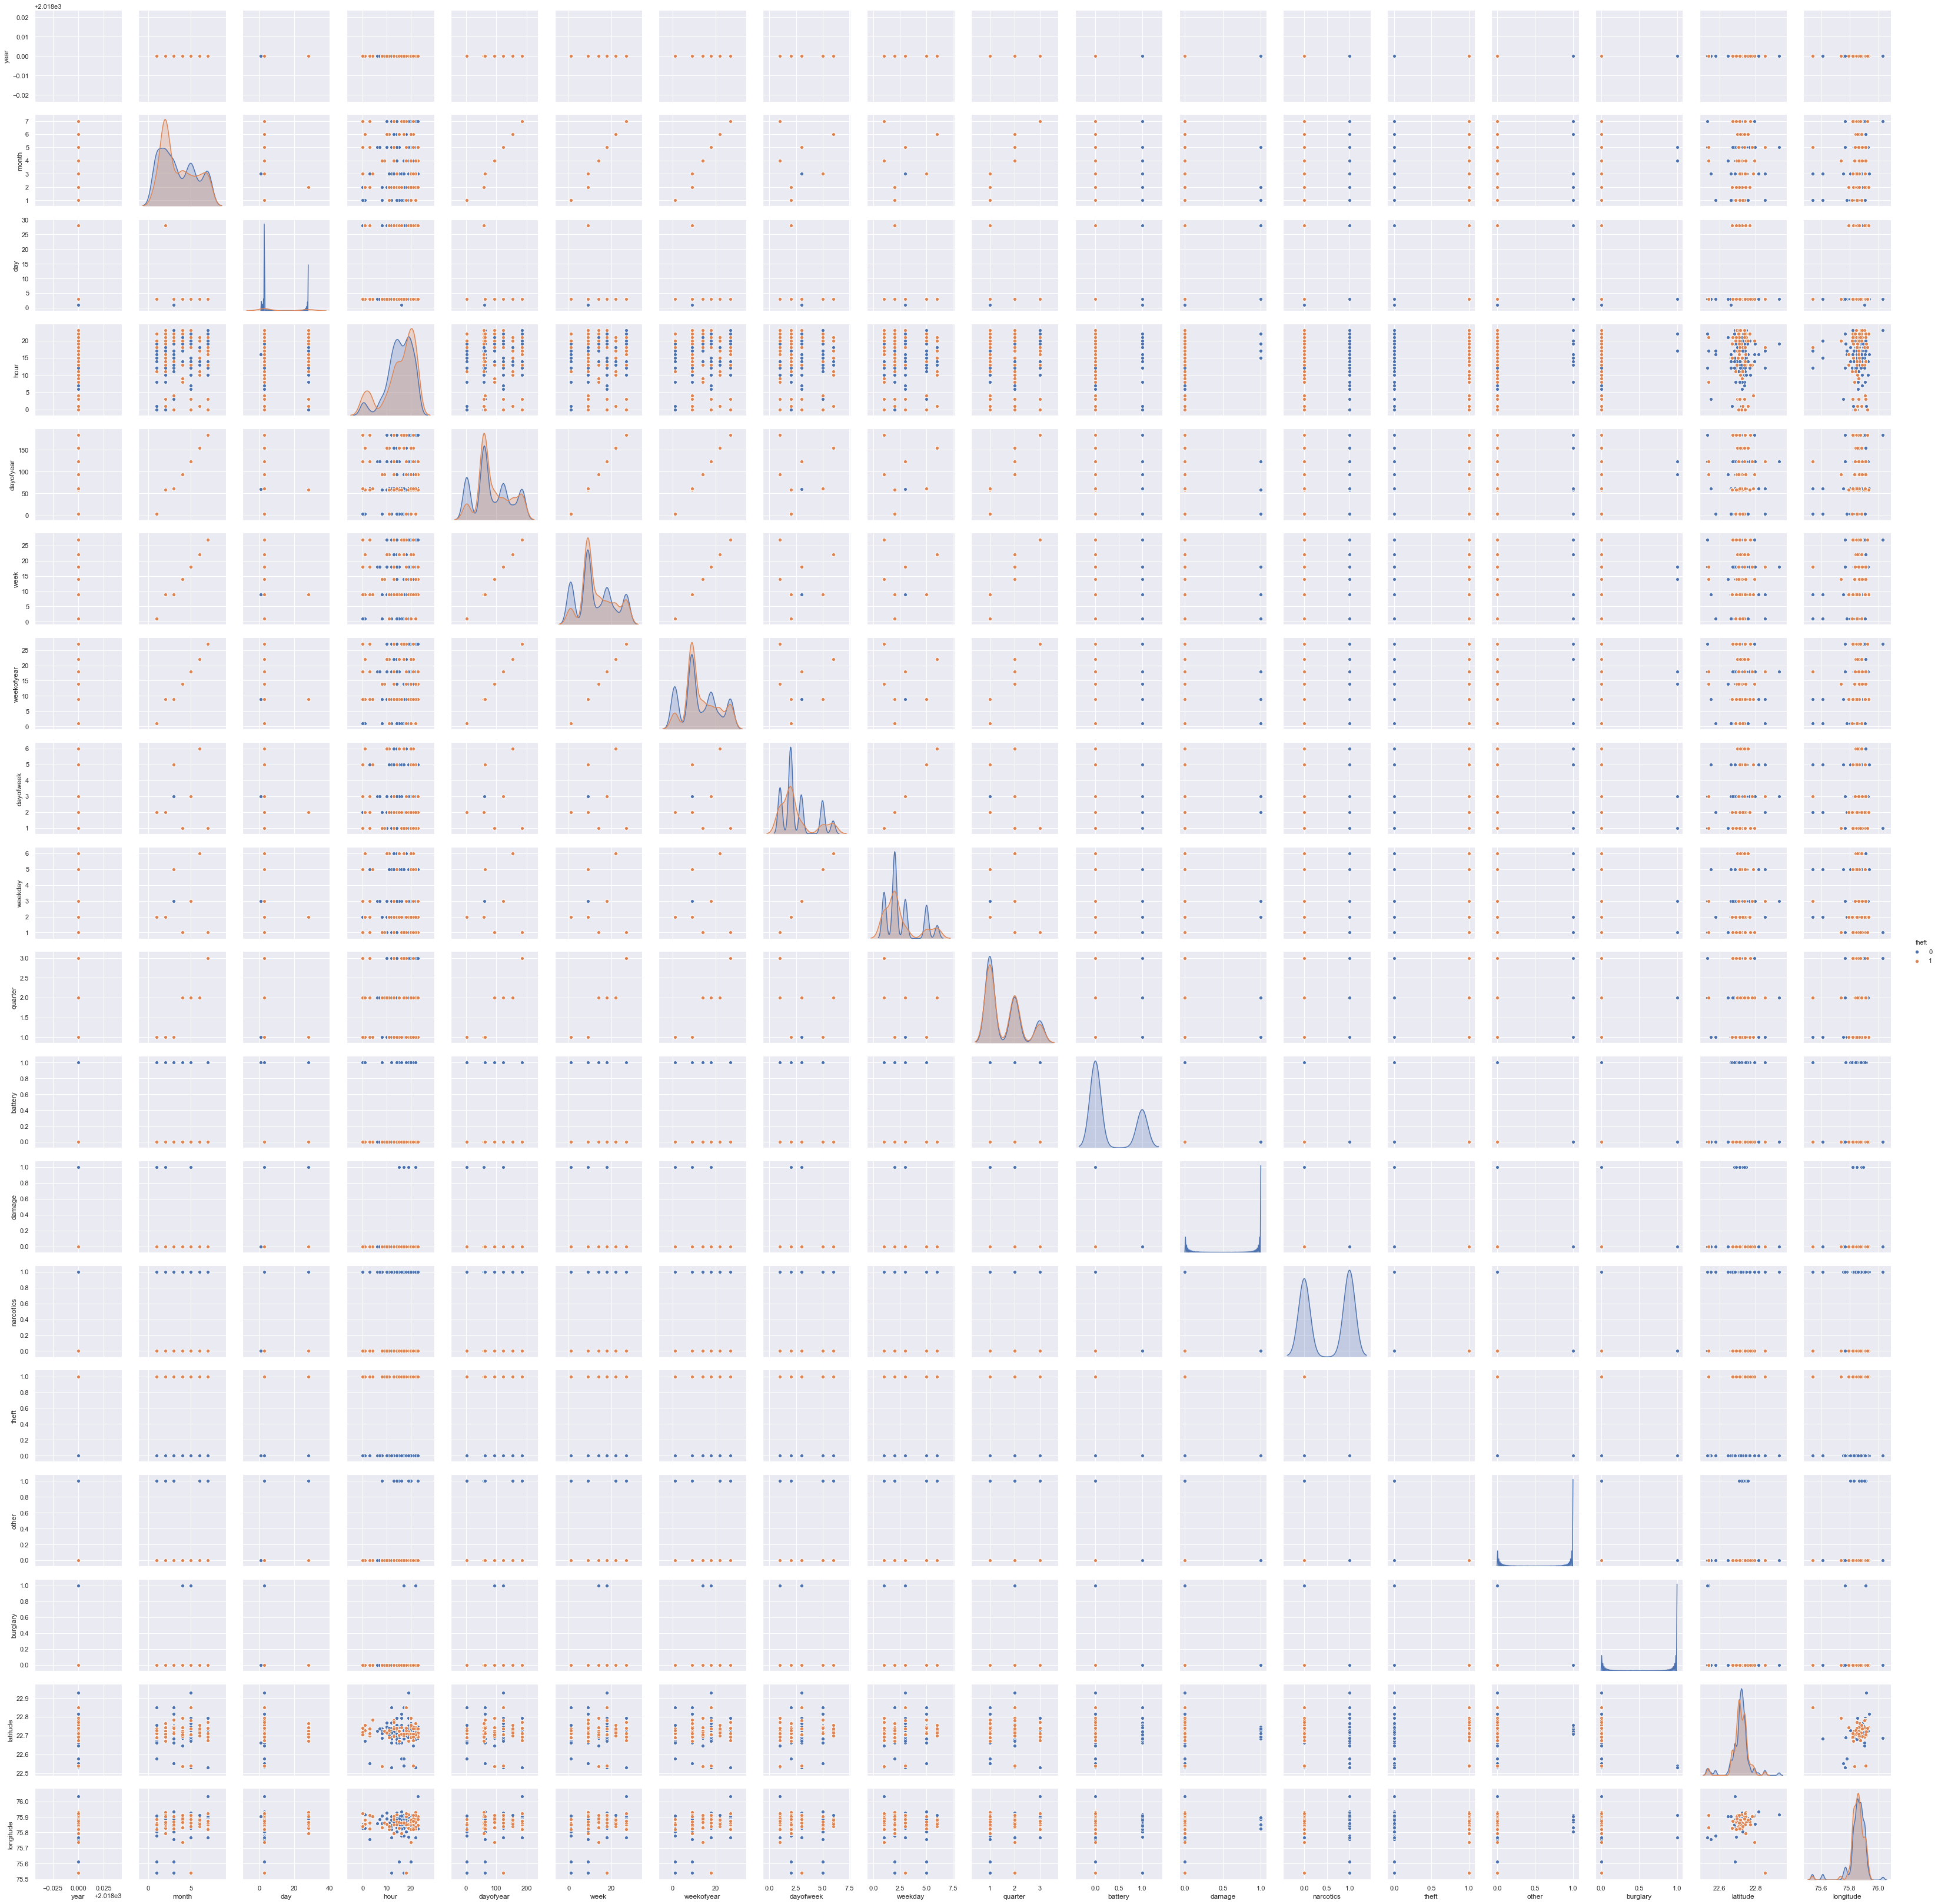

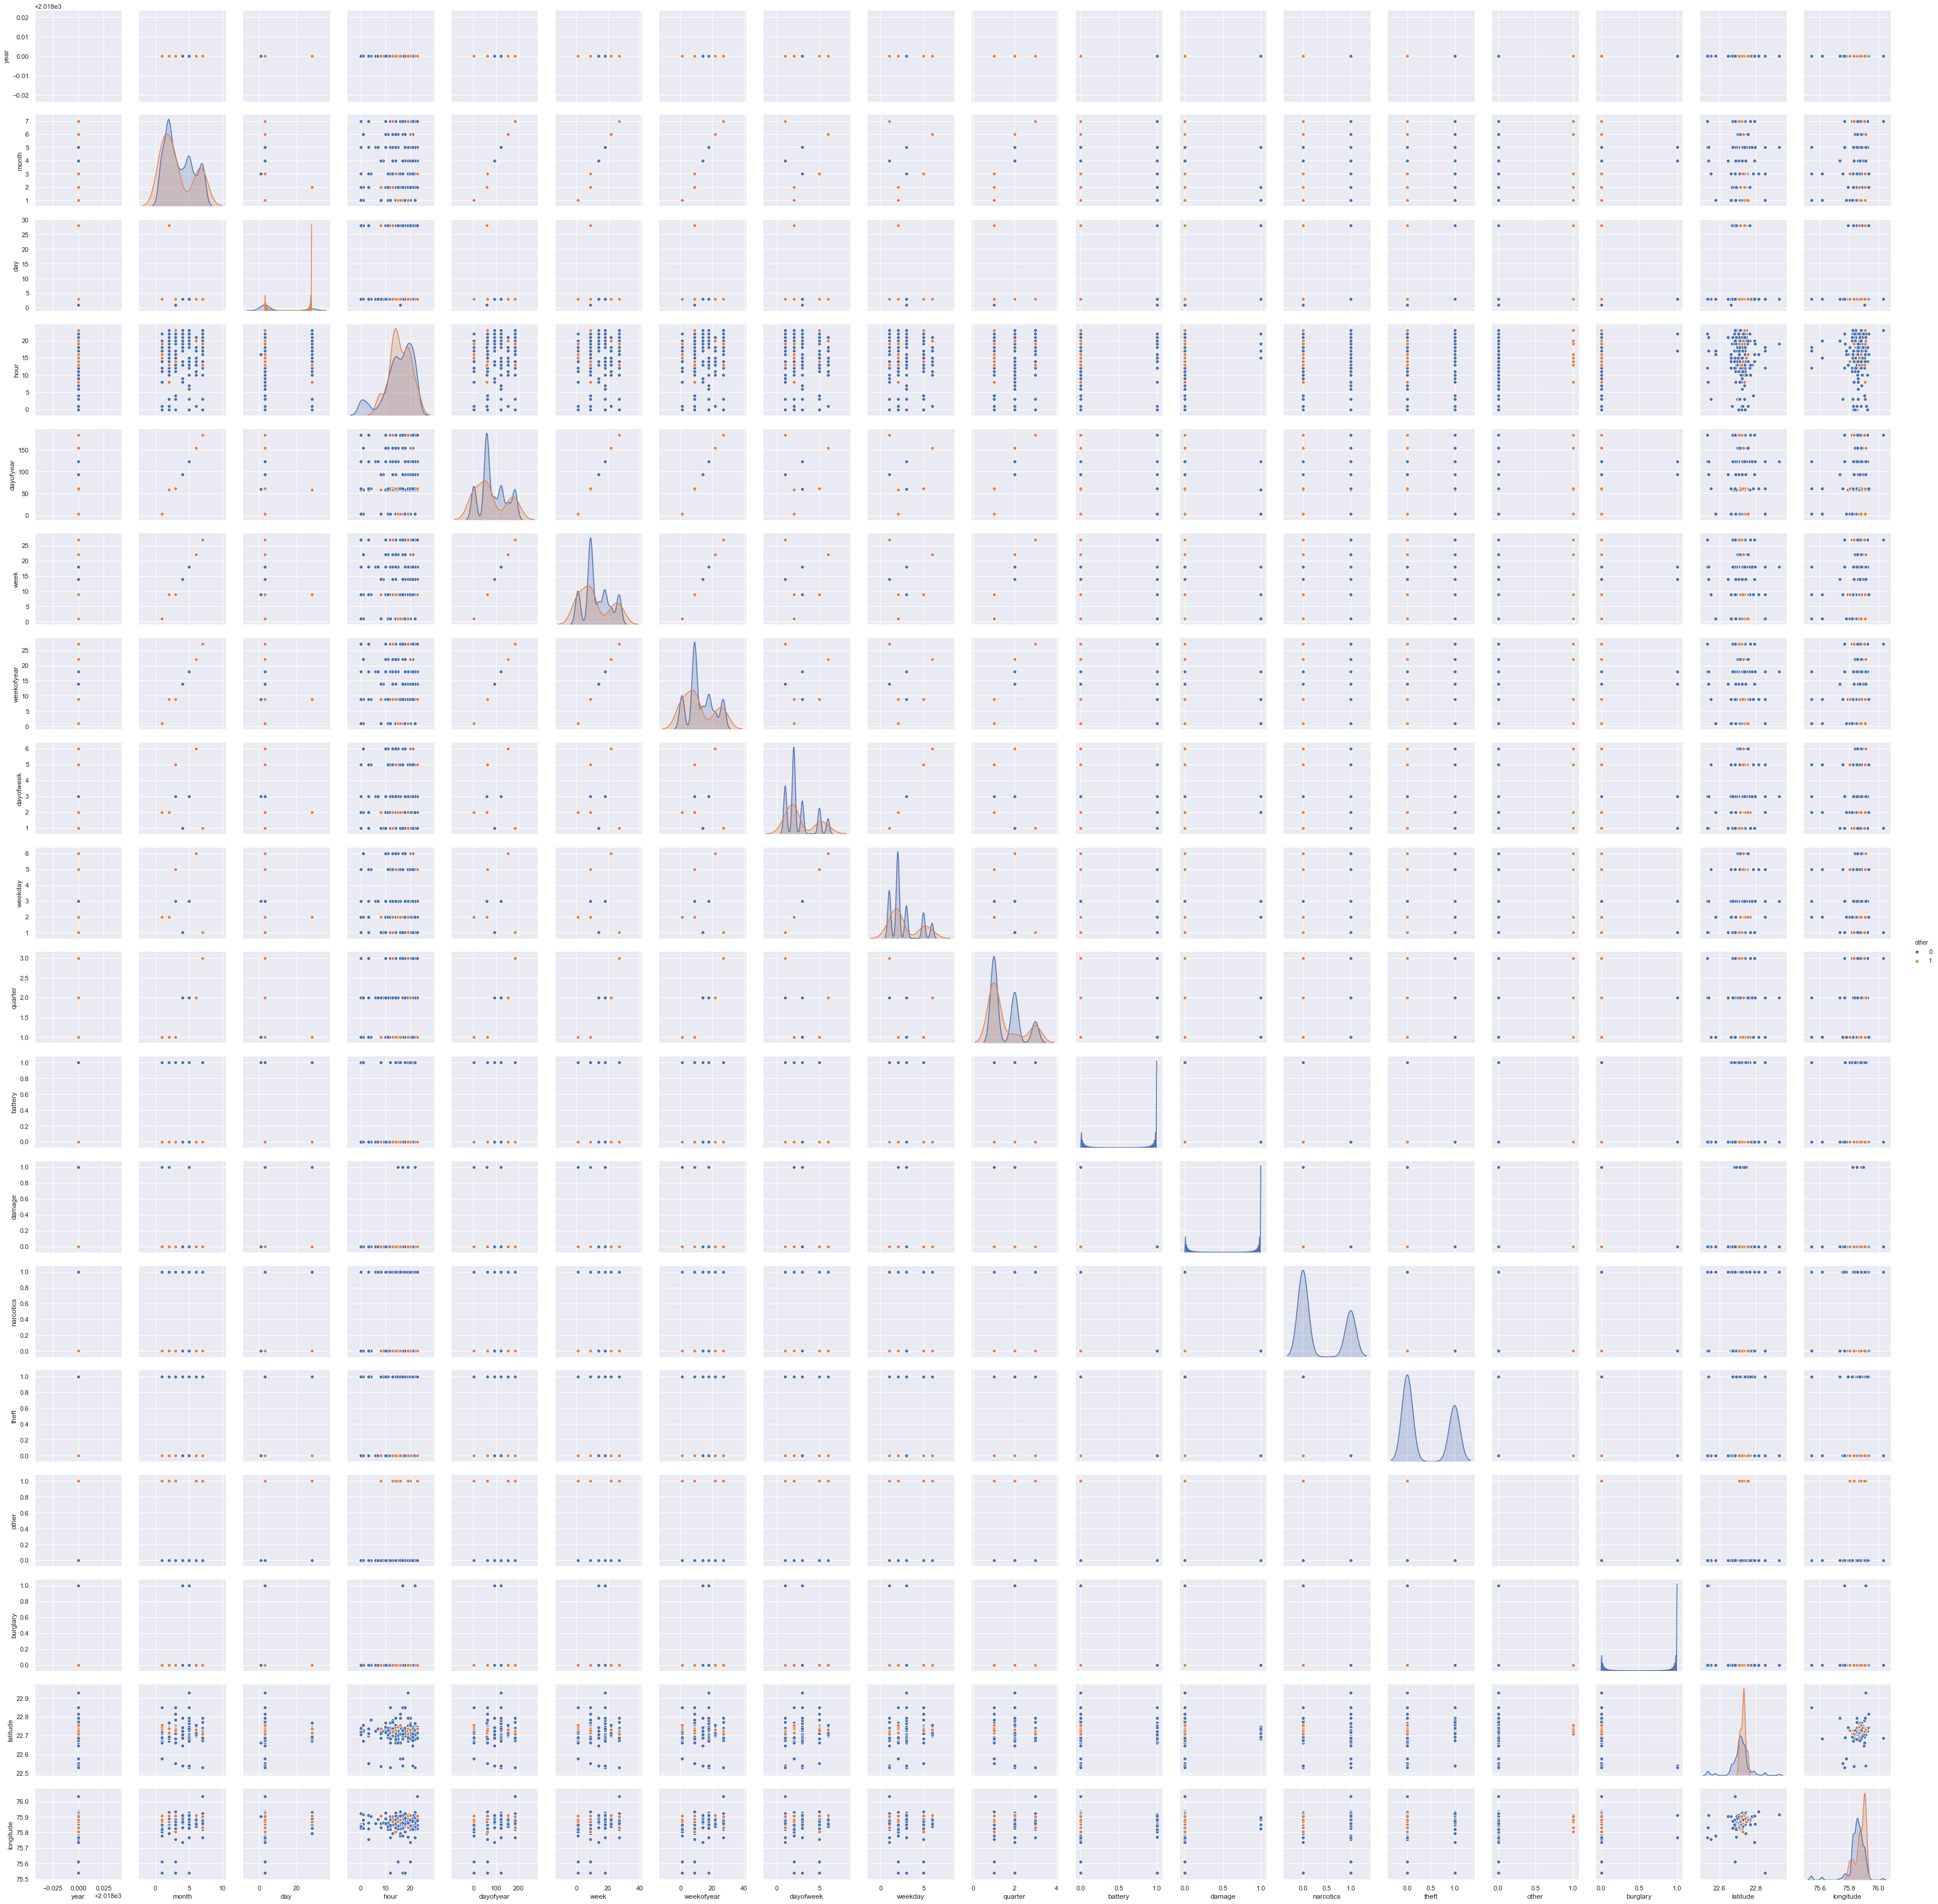

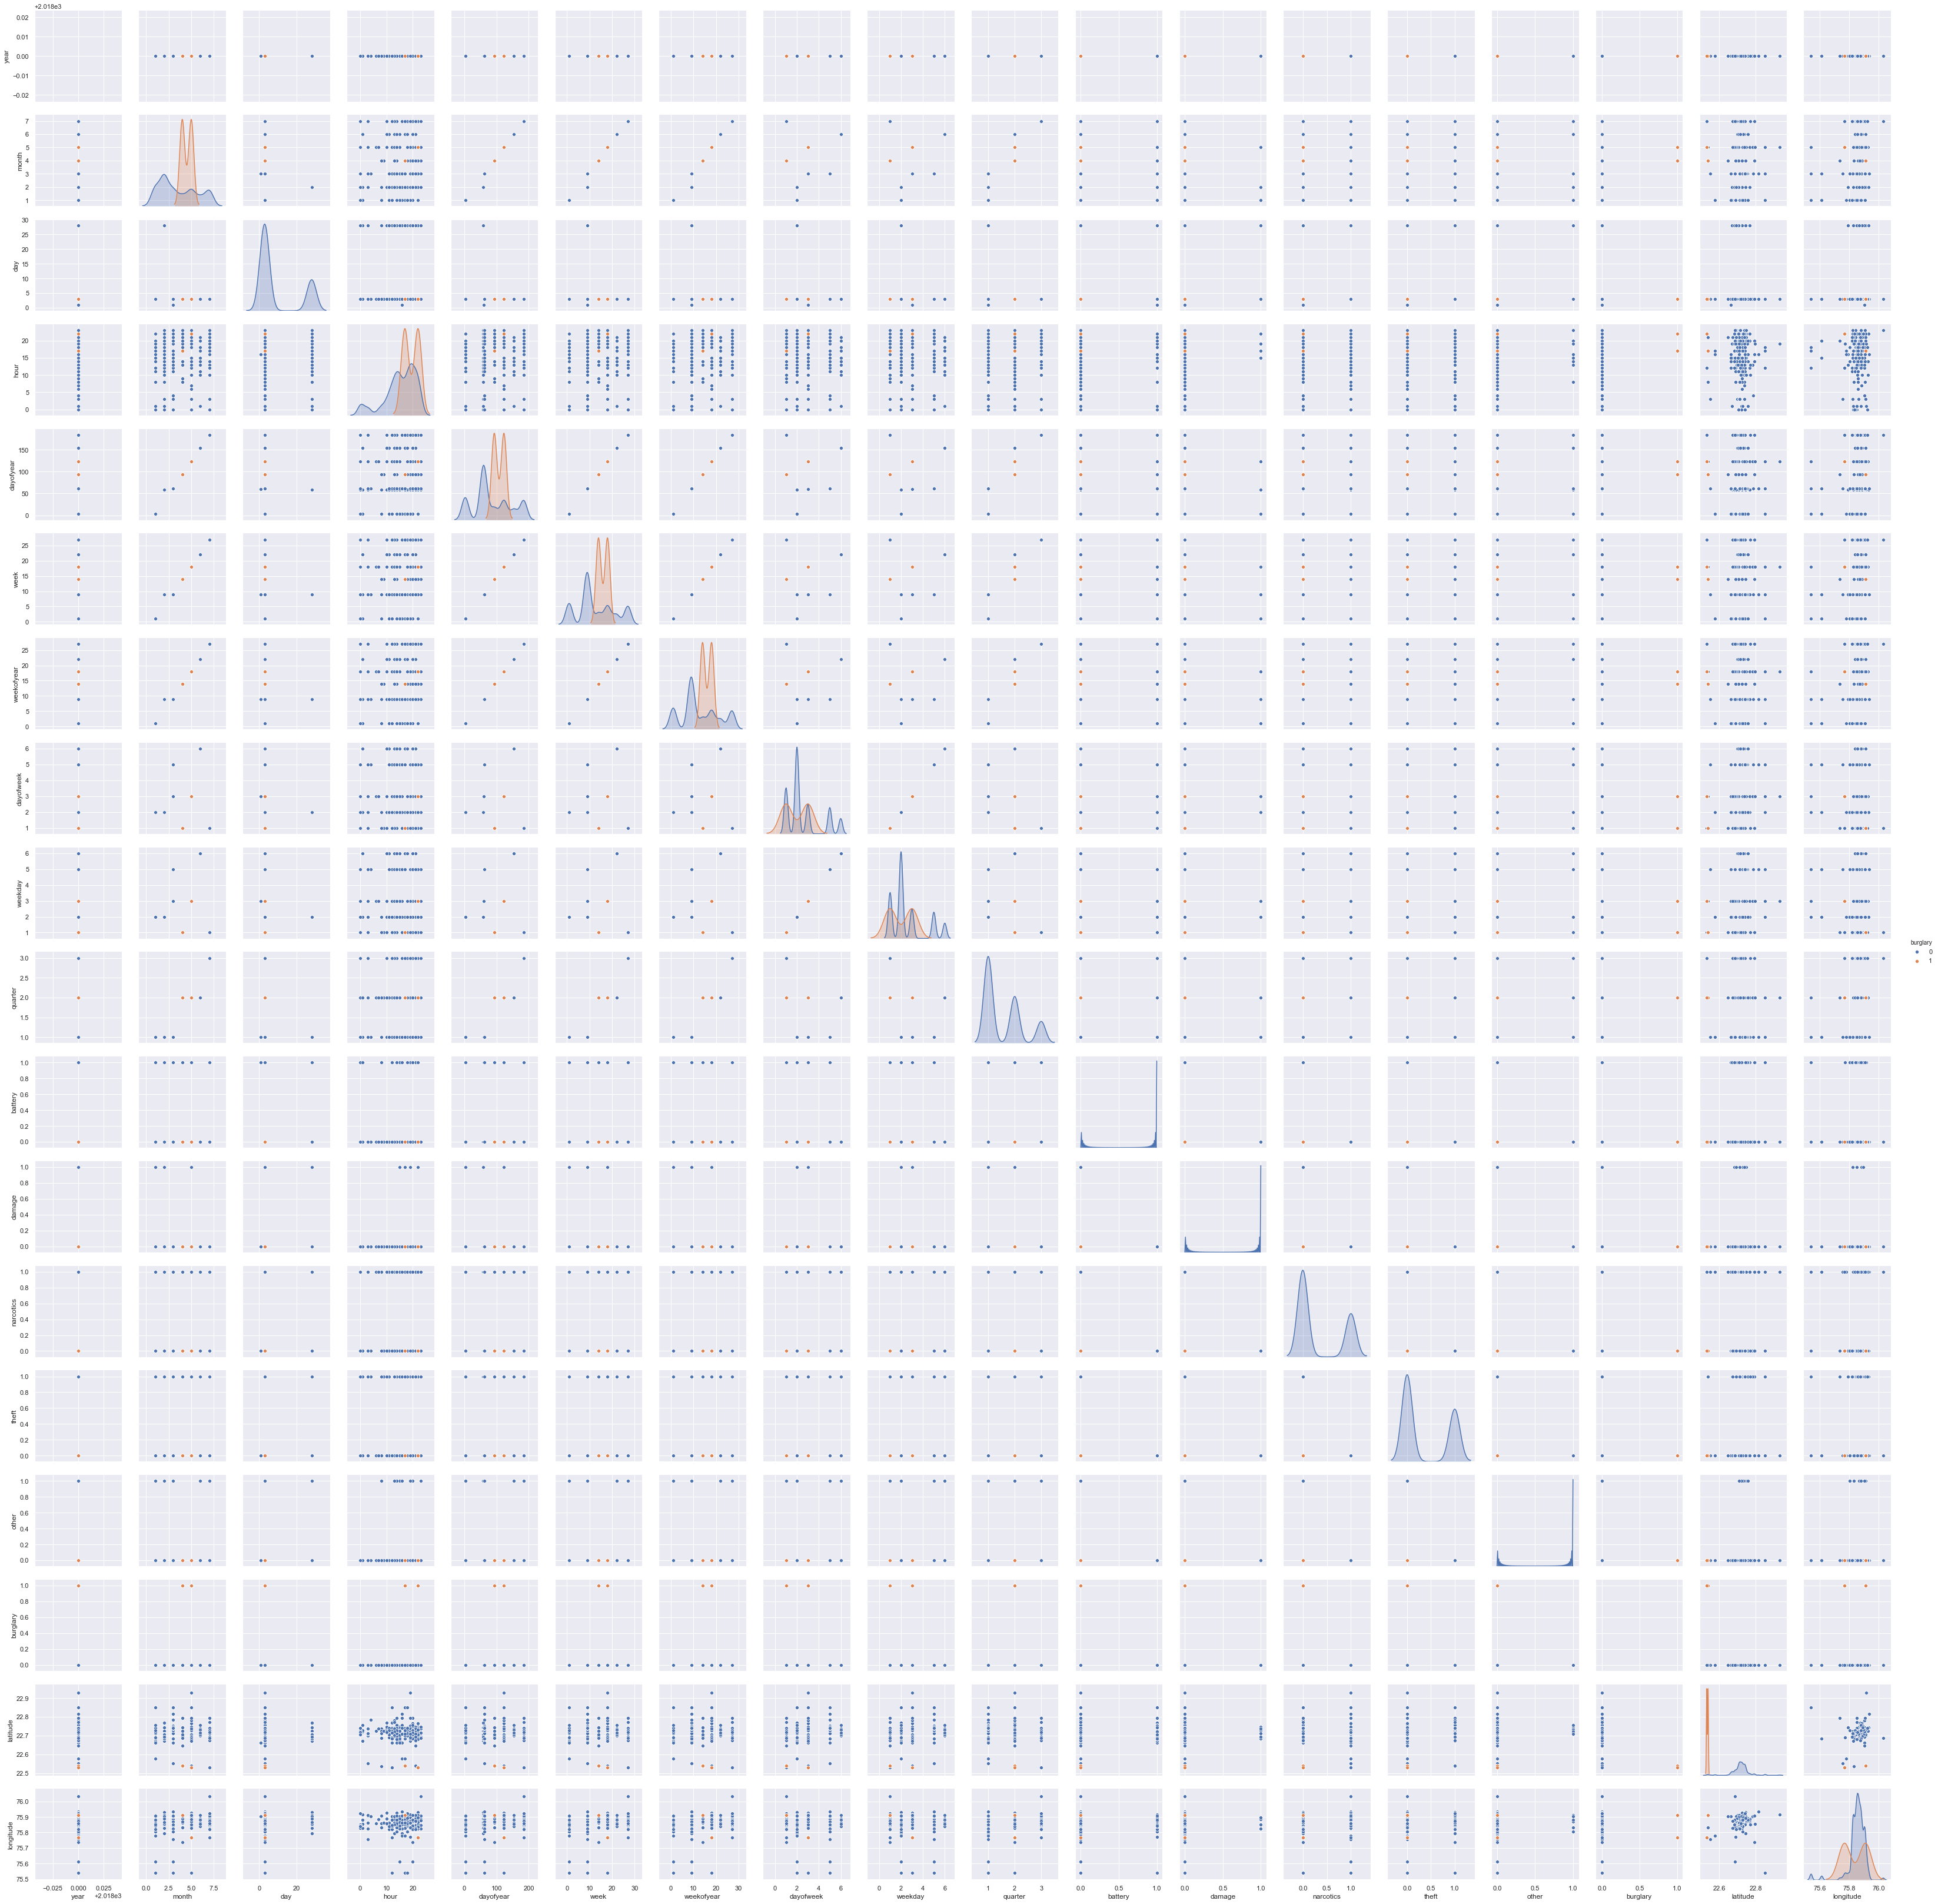

In [5]:
import seaborn as sns
%matplotlib inline
import os
for c in ['battery', 'damage', 'narcotics', 'theft', 'other', 'burglary']:
    png = c + '-seaborn-pair.png'
    file = os.path.join('Figures', png)
    sns.set()
    sns_plot = sns.pairplot(df,hue=c)
    sns_plot.savefig(file)

In [68]:
#import IPython.display as display
#from PIL import Image
#display.display(Image.open(file))

In [6]:
feature_names=[ 'dayofweek', 'dayofyear', 'hour', 'month', 'week','latitude', 'longitude']

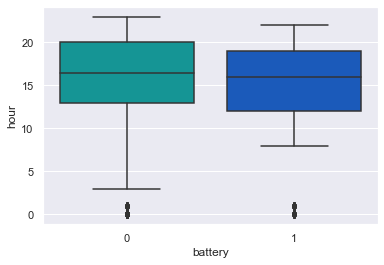

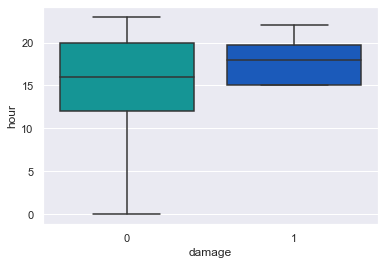

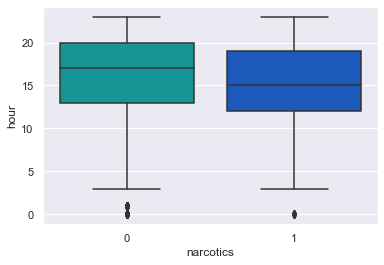

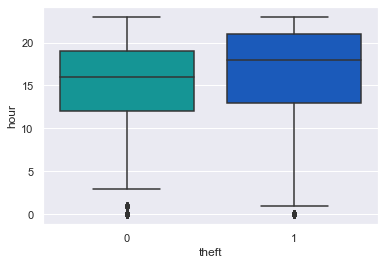

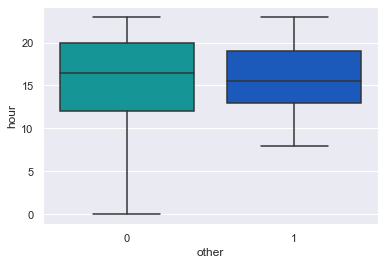

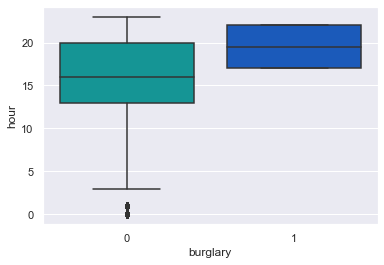

In [7]:
for c in ['battery', 'damage', 'narcotics', 'theft', 'other', 'burglary']:
    png = c + '-seaborn-box.png'
    file = os.path.join('Figures', png)
    sns.set()
    fig, ax = plt.subplots()
    sns.boxplot(x=c ,y='hour' ,data=df, palette='winter_r')
    plt.savefig(file)

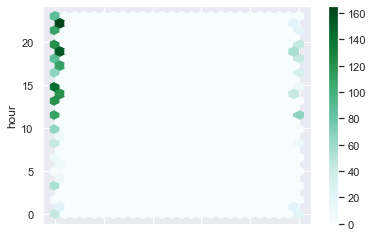

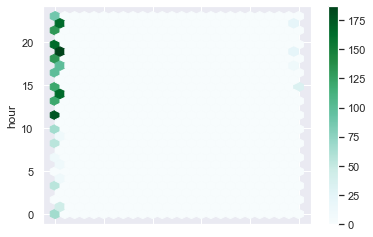

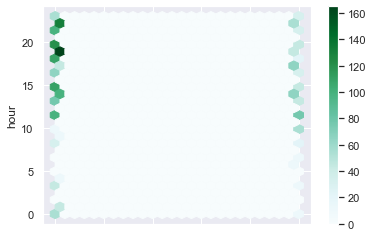

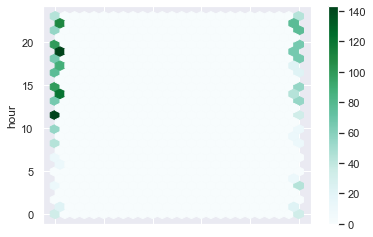

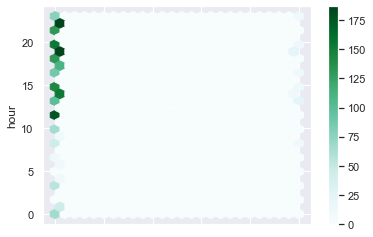

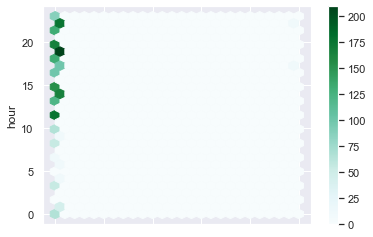

In [8]:
for c in ['battery', 'damage', 'narcotics', 'theft', 'other', 'burglary']:
    png = c + '-hexbin.png'
    file = os.path.join('Figures', png)
    df1 = pd.DataFrame(data=df, columns=[c, 'hour', 'day'])
    df1.plot.hexbin(x=c,y='hour',gridsize=25)
    plt.savefig(file)

In [10]:
df1 = pd.DataFrame(data=df, columns=['damage', 'hour', 'day'])

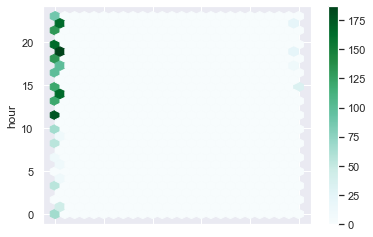

In [11]:
df1.plot.hexbin(x='damage',y='hour',gridsize=25)

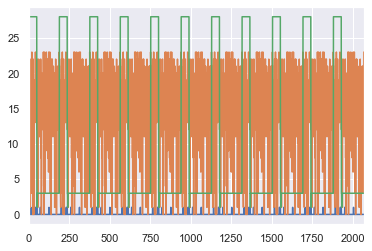

In [12]:
df1.plot(legend=False)

In [13]:
df1 = pd.DataFrame(data=df, columns=['battery', 'damage', 'narcotics', 'theft', 'other', 'burglary'])
df1.head()

battery  damage  narcotics  theft  other  burglary
0        1       0          0      0      0         0
1        1       0          0      0      0         0
2        0       0          1      0      0         0
3        0       0          1      0      0         0
4        0       0          1      0      0         0

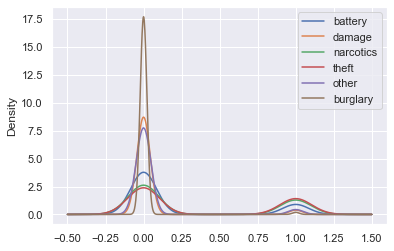

In [14]:
df1.plot.kde()
file = os.path.join('Figures', 'kde.png')
plt.savefig(file)

#   XY array

In [15]:
X=df.iloc[:,[1,2,3,4,6,16,17]].values
Y=df.iloc[:,[10,11,12,13,14,15]].values

In [16]:
X

array([[ 2.      , 28.      , 21.      , ...,  9.      , 22.73726 ,
        75.875987],
       [ 2.      , 28.      , 21.      , ...,  9.      , 22.720992,
        75.876083],
       [ 2.      , 28.      , 10.      , ...,  9.      , 22.736676,
        75.883168],
       ...,
       [ 7.      ,  3.      , 12.      , ..., 27.      , 22.531931,
        75.769126],
       [ 7.      ,  3.      , 10.      , ..., 27.      , 22.719569,
        75.857726],
       [ 7.      ,  3.      , 23.      , ..., 27.      , 22.686437,
        76.032055]])

In [17]:
Y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

## Splitting the data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

# Creating & Training KNN Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [21]:
knn.score(X_test,y_test)

0.9323671497584541

In [22]:
knn.score(X_train,y_train)

0.9770253929866989

## Elbow Method For optimum value of K

In [23]:
error_rate = []
for i in range(1,140):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(numpy.mean(pred_i != y_test))

## Creating & Training Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [25]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=500,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=300, splitter='best')

In [26]:
y_pred=dtree.predict(X_test)
dtree.score(X_test,y_test)

0.9806763285024155

In [27]:
dtree.score(X_train,y_train)

0.9915356711003628

In [28]:
y_pred

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

In [29]:
treefeatures=dtree.feature_importances_
indices = numpy.argsort(treefeatures)

In [30]:
treefeatures

array([0.00934881, 0.03958678, 0.3138252 , 0.09146966, 0.0174176 ,
       0.26411523, 0.26423671])

In [31]:
features = df.iloc[:,[1,2,3,4,6,16,17]]
features.head()

month   day  hour  dayofyear  weekofyear   latitude  longitude
0    2.0  28.0  21.0       59.0         9.0  22.737260  75.875987
1    2.0  28.0  21.0       59.0         9.0  22.720992  75.876083
2    2.0  28.0  10.0       59.0         9.0  22.736676  75.883168
3    2.0  28.0  10.0       59.0         9.0  22.746527  75.887139
4    2.0  28.0  10.0       59.0         9.0  22.769531  75.888772

Text(0.5, 0, 'Relative Importance')

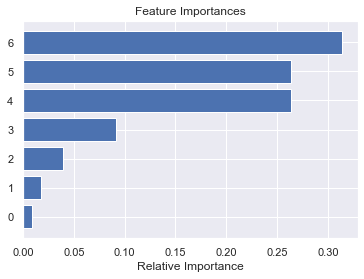

In [32]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), treefeatures[indices], color='b', align='center')
plt.xlabel('Relative Importance')

In [33]:
feature_names=[ 'dayofweek', 'dayofyear', 'hour', 'month', 'week','latitude', 'longitude']

# Tree visualation

C:\Users\skao2\Anaconda3\envs\PythonData\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


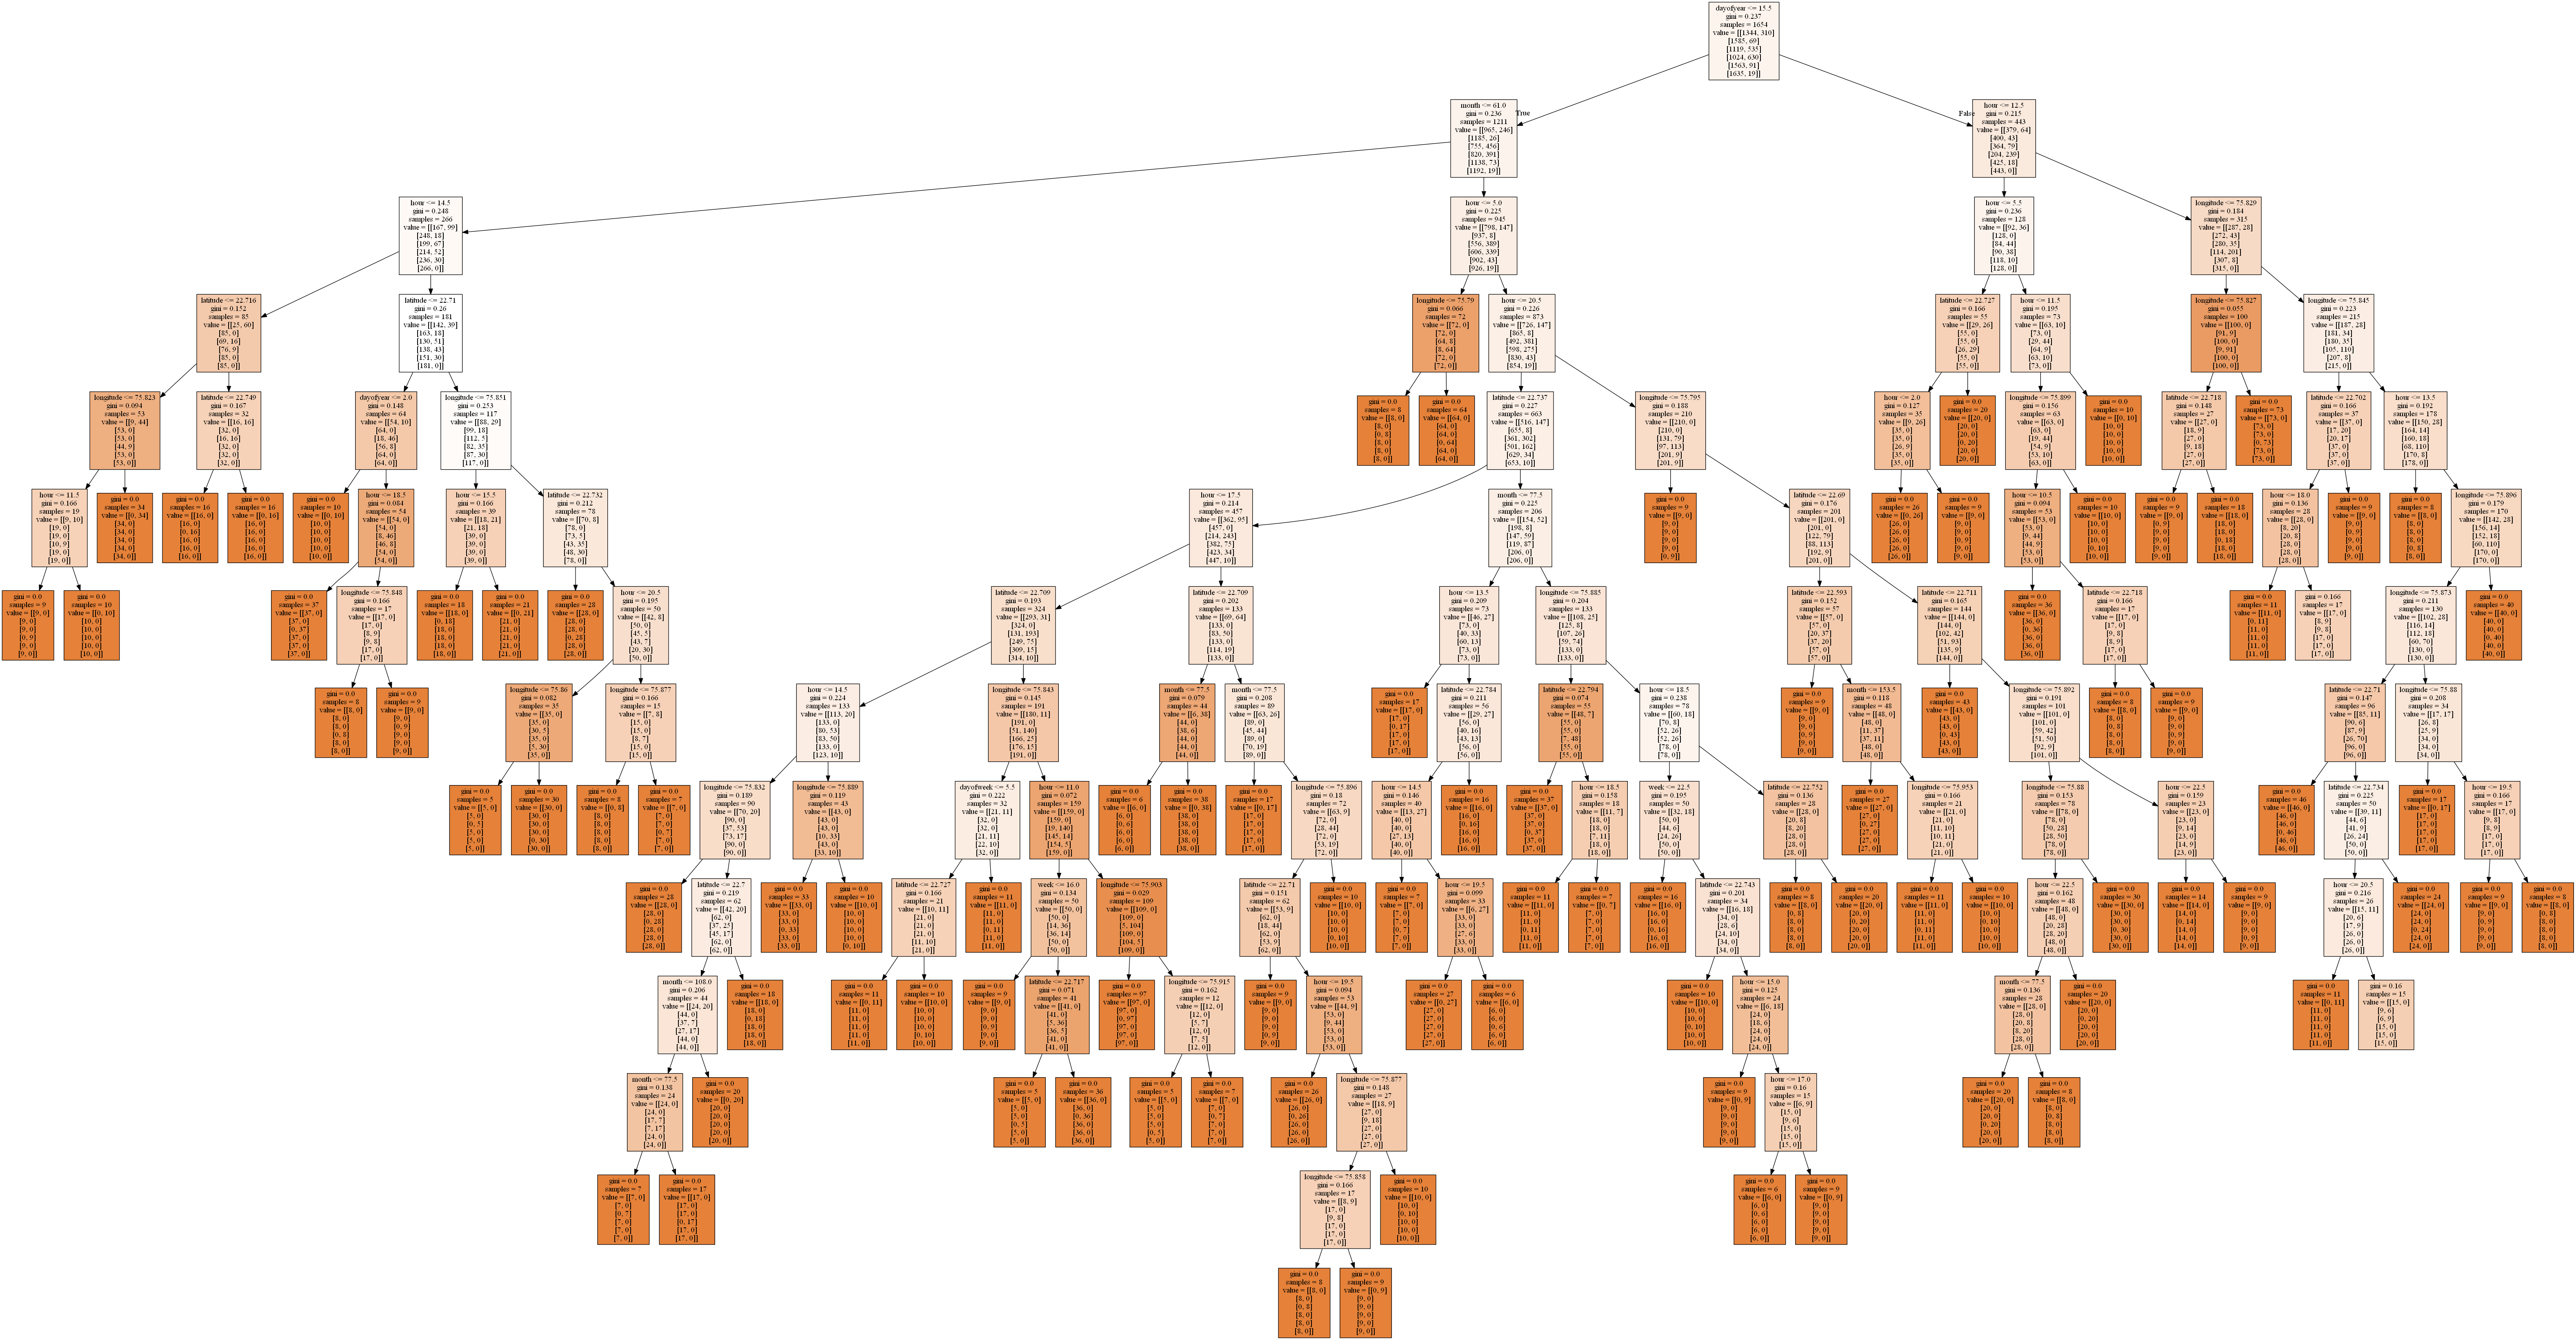

In [34]:
#  To run this tree visulation:
#   conda install pydot-ng 
#   conda install graphviz
#   execute graphviz-2.38.msi from https://graphviz.gitlab.io/_pages/Download/Download_windows.html 
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=feature_names,filled=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Creating & Training Random Tree Model

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
y_pred=rfc.predict(X_test)

In [37]:
rfc.score(X_test,y_test)

0.9806763285024155

In [38]:
rfc.score(X_train,y_train)

0.9915356711003628

In [39]:
om=rfc.feature_importances_
indices = numpy.argsort(om)

In [40]:
om

array([0.04184849, 0.01669792, 0.30926335, 0.04259867, 0.03445722,
       0.28710104, 0.2680333 ])

In [41]:
features = df.columns

Text(0.5, 0, 'Relative Importance')

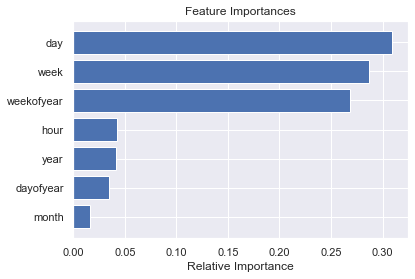

In [42]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')